<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/ADS_Weekly_Task_6_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do not forget to make a copy before you start!

## **<font color='crimson'> Deadline: 2023/06/14 23:59:00 </font>**

** We do not have the class at 2023/06/09.

## How to assign your weekly task to Google classroom

- **Recommended:**

  -  Once you copy the task to your own driver, the task colab file is in the [Colab Notebook] folder in you google driver.
  -  Just upload the task **ipynb** file to the Google Classroom.

  - Do not forget to save your colab file before uploading.


- Another way:


- 1. Download the colab file using **'File - download - .ipynb'** in the menu bar.

- 2. You will get a ipynb file in your local laptop, then upload the file to the Google Classroom.



###<font color='crimson'>[Task 1] Unsupervised Learning</font>

The data presented here is evaluation data for a hotel. Analyse and try to interpret the characteristics of the hotel in terms of various factors such as 'price', 'convenience', 'cleanliness', etc.

https://raw.githubusercontent.com/dgod1028/Tohoku_PBL/main/Dataset/Hostel.csv

Please finish the following tasks1.

1. Set the `hostel.name` as the index.

1. Use only `atmosphere,	cleanliness,	facilities,	location.y,	security,	staff,	valueformoney` for the data analysis, save the data as `df2`.

1. Drop the rows with missing values(NAN). You can easily do this by applying `df.dropna()` method.

1. Fit PCA to the data.

1. Print how many dimensions you should leave to gurantee you have at least 80% of information.

1. Visualize the principle component vectors and principle scores based on PC1 and PC2, and <font size=5>interpret what you have obtained from the figure (40% of the score)</font> .

1. Apply KMeans to the data with cluster number 4.

1. <font size=5>Try to interpret the feature of each clusters based on the clustered hotels(40% of the score)</font> .

**Unsupervised learning do not have only answer, it is important that you need to extract useful information from the analysis.**

# 主成分分析

In [ ]:
# Task 1
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Tohoku_PBL/main/Dataset/Hostel.csv', index_col=0)
#display(df)
df.set_index('hostel.name')
df2 = df[["atmosphere", "cleanliness", "facilities", "location.y", "security", "staff", "valueformoney"]]
df2.head(5)
df2 = df2.dropna()
df2.head()

,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney
1,8.9,9.4,9.3,8.9,9.0,9.4,9.4
2,9.4,9.7,9.5,9.7,9.2,9.7,9.5
3,8.0,7.0,9.0,8.0,10.0,10.0,9.0
4,8.0,7.5,7.5,7.5,7.0,8.0,6.5
5,9.5,9.5,9.0,9.0,9.5,10.0,9.5


In [ ]:
#正規化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_std = df2.copy()
df2_std[df2_std.columns] = scaler.fit_transform(df2)


array([0.66913698, 0.76913198, 0.83932351, 0.89729806])

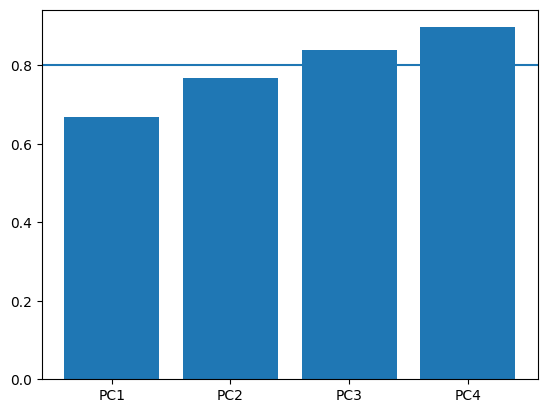

グラフから80%の情報を得るためにはPC3まで使う必要がある


In [ ]:
#主成分分析
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
k = 4
pca = PCA(n_components = k)
pca.fit(df2_std)
pca.components_ #分散共分散行列の固有ベクトル
#display(pca.explained_variance_ratio_)
display(pca.explained_variance_ratio_.cumsum())
plt.bar([1, 2, 3, 4], pca.explained_variance_ratio_.cumsum(), tick_label=["PC1","PC2","PC3","PC4"])
plt.axhline(y=0.8)
plt.show()
print("グラフから80%の情報を得るためにはPC3まで使う必要がある")

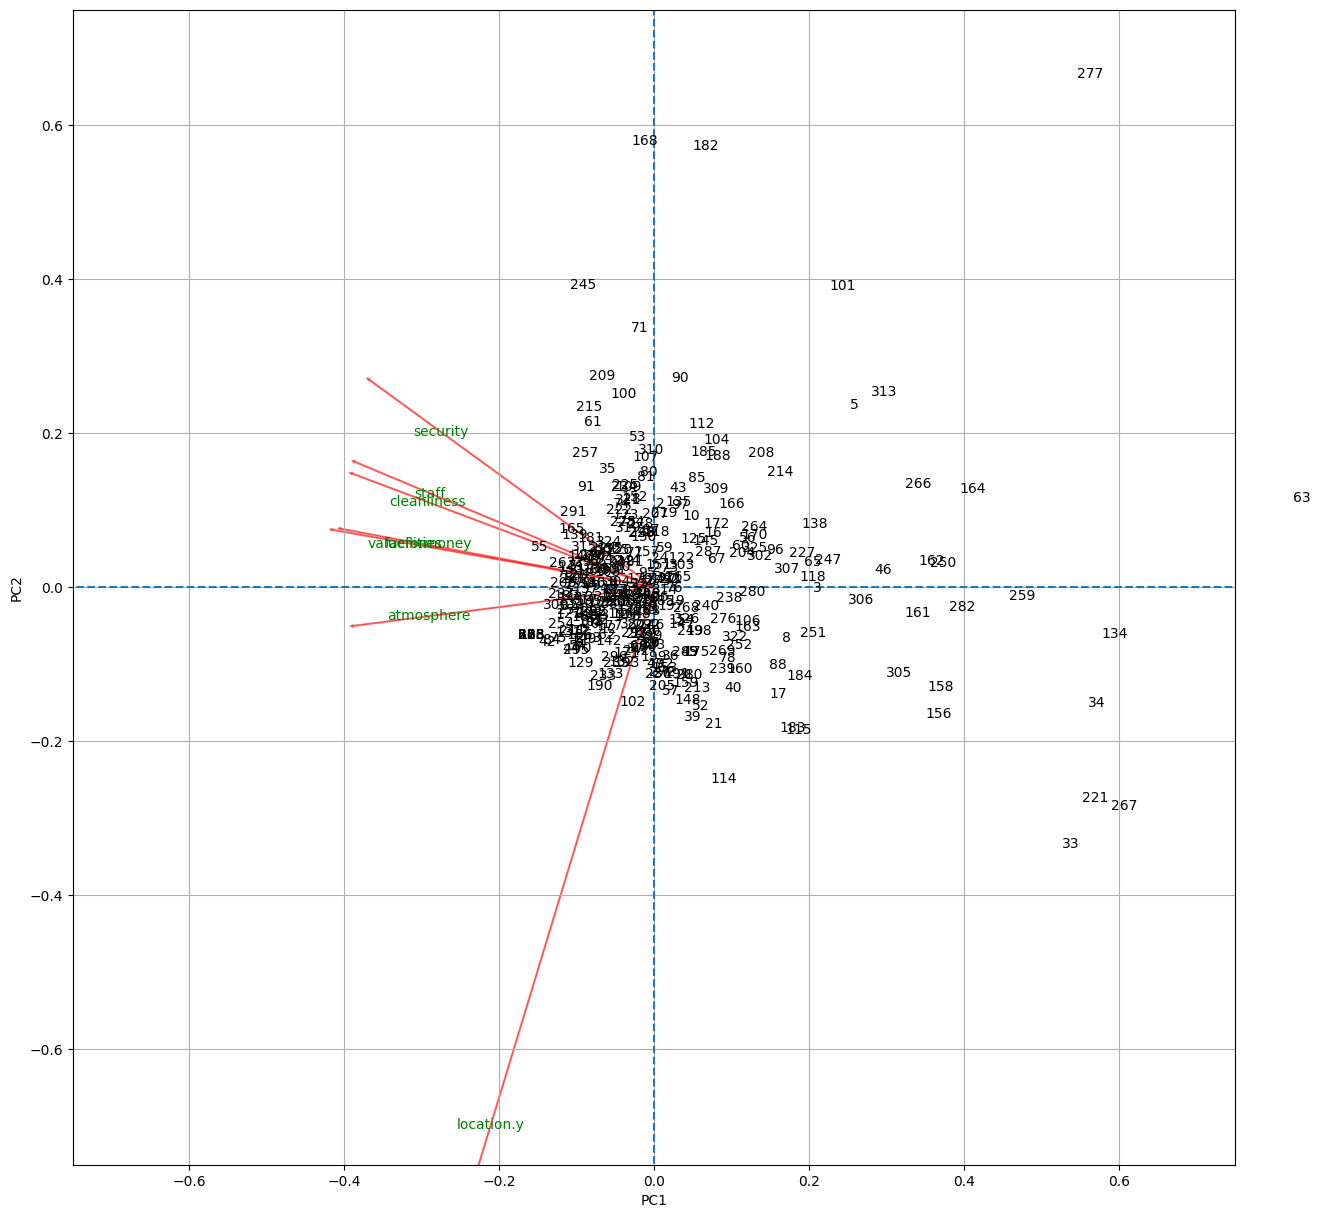

In [ ]:
# display(pca.components_[0:2, :].T)
# display(pd.DataFrame(pca_score[:, 0:2]))


#新たにPC1とPC2を基底にとった場合を図示
pca_score = pca.transform(df2_std)
coefficients = pca.components_[0:2, :] #PC1と#PC2に対応する固有ベクトル
score = pca_score[:, 0:2] #PC1とPC2軸上での各データの座標



plt.figure(figsize=(15,15))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    count = 0
    xs_pos = xs * scalex
    ys_pos = ys * scaley
    for i in range(xs.shape[0]):
      plt.text(xs_pos[i], ys_pos[i], count)
      count += 1

    for i in range(n): #nは特徴量の個数
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            #plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
            plt.text(coeff[i,0]* 0.75, coeff[i,1] * 0.75, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.75,0.75)
    plt.ylim(-0.75,0.75)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.vlines(0, -5, 5, ls='--')
    plt.hlines(0, -5, 5, ls='--')


myplot(score,coefficients.T, df2_std.columns)
plt.show()

## 主成分分析の結果の解釈
新たな基底PC1, PC2について、
- 図からPC1はホテルの立地を主に反映しており、PC2はそれ以外の特徴量を強く反映していることが分かる。

# K-means法

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
k = 4 #クラスタ数
seed = 1
np.random.seed(seed) #シード値を固定
kmeans = KMeans(n_clusters=k)

kmeans.fit(df2)
y = kmeans.labels_ + 1 #各データがどのクラスタに分類されているか

for i in range(k):
  df2["Cluster"] = y

# クラスタごとのホテル数を表示
cluster_counts = df2['Cluster'].value_counts()
print(cluster_counts)
print(cluster_counts[1]/df2.shape[0] * 100)
print("クラスタ1には{:.2f}%のデータ、クラスタ2には{:.2f}%のデータ、クラスタ3には{:.2f}%のデータ、クラスタ4には{:.2f}%のデータが属する".format(cluster_counts[1]/df2.shape[0] * 100, cluster_counts[2]/df2.shape[0] * 100,cluster_counts[3]/df2.shape[0] * 100,cluster_counts[4]/df2.shape[0] * 100))

# クラスタごとの特徴を表示
cluster_means = df2.groupby('Cluster').mean()
print("各クラスタの重心:")
print(cluster_means)

2    168
3    121
1     30
4      8
Name: Cluster, dtype: int64
9.174311926605505
クラスタ1には9.17%のデータ、クラスタ2には51.38%のデータ、クラスタ3には37.00%のデータ、クラスタ4には2.45%のデータが属する
各クラスタの重心:
         atmosphere  cleanliness  facilities  location.y  security     staff  \
Cluster                                                                        
1          6.323333     7.186667    6.733333    7.513333  7.266667  7.843333   
2          9.086905     9.646429    9.331548    9.048214  9.446429  9.636905   
3          7.860331     8.871074    8.366942    8.658678  8.877686  9.043802   
4          3.337500     4.662500    3.662500    6.250000  5.825000  4.750000   

         valueformoney  
Cluster                 
1             7.106667  
2             9.407143  
3             8.714050  
4             5.675000  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Kmansの結果の考察
各ホテルをクラスタ1からクラスタ4に分類した場合の考察
- クラスタ1 \\
全体的に平凡

- クラスタ2 \\
ホテル全体の約半数のデータを含んでいる。全体的な評価が高い。

- クラスタ3 \\
クラスタ2ほどではないが、評価は高め。

- クラスタ4 \\
全体的な評価が低い。

<font size=8>★Challenge★</font>

###<font color='crimson'>[Task 2] Write Kmeans by Scratch</font>

If you have learned the programming well for now, you are capable to write the Kmeans algorithm by your own following the instruction below. Free to use any other externel materials if you need.


### <font color="Crimson">**KMeans**</font>

The name of the method derives from the fact that it "uses the mean of the clusters (means) to classify the data into $k$ number of clusters predetermined by the analyst" Kmeans mainly clusters the data in the following steps.

- 1. determine the number $K$ of clusters.

- 2. randomly determine $K$ central 'kernel' data for each cluster from the data.(Randomly select $K$ data as the center of each cluster)

- 3. calculate the distance from all the data to each 'kernel' data individually.

- 4. classify each data into clusters of the 'kernel' data with the closest distance

- 5. recalculate the centre point of each cluster based on the data belonging to each cluster and make that centre point the new 'kernel'. (You can calculate the centre point by taking mean for all the data belongs to the cluster)

- 6. If the 'kernel' of the cluster changes beyond a pre-determined tolerance, repeat steps 2 to 5. When the positions of the 'nuclei' of the clusters converge (i.e. the changes are kept within the tolerance values), the training is terminated.For simpler way,just loop for a certain times(e.g., loop step 2 ~ 5 for 10 times).

There are several ways to calculate the distance between data individuals, but **Euclidean distance** is one of the most commonly used methods and is defined as follows.
<br><br>
$$
d_{ij} =\sqrt{\sum_{m=1}^p (x_{im} - x_{jm})^2} \tag{6.4}
$$
<br>
$D_{IJ}$ is the distance between data $i$ and data $j$ and $P$ is the dimension of the explanatory variable.

クラスタの中心点:
[[0.50156601 0.77890802]
 [0.31081231 0.21854294]
 [0.80466054 0.30493724]]
クラスタのラベル:
[0 0 0 2 1 1 2 0 1 1 1 1 2 2 2 1 2 2 1 1 2 1 0 1 0 0 2 1 0 0 2 2 1 1 2 0 1
 0 0 0 1 0 2 2 2 0 2 1 1 0 0 1 1 1 0 2 2 0 0 2 1 0 1 0 2 1 0 0 0 1 2 0 0 2
 0 1 2 1 0 1 2 0 0 0 2 2 1 2 1 2 2 0 2 0 1 2 0 0 0 2]


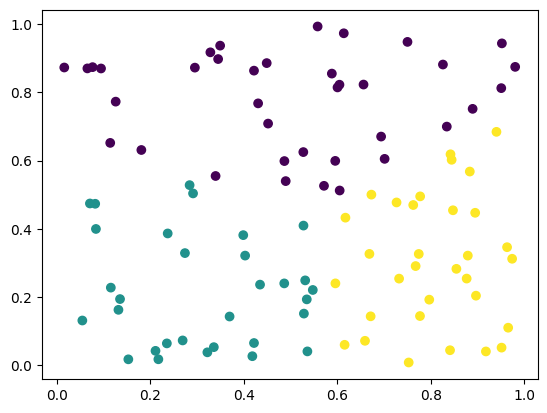

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def k_means(data, k, max_iters=10):
    # データの次元数を取得
    num_dims = data.shape[1]

    # データ点の範囲を取得
    data_range = np.max(data, axis=0) - np.min(data, axis=0)

    # Step 1: ランダムにクラスタの中心点を初期化
    centers = np.random.rand(k, num_dims) * data_range + np.min(data, axis=0)

    for _ in range(max_iters):
        # Step 2: 各データ点を最も近い中心点に割り当てる
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=-1)
        labels = np.argmin(distances, axis=1)

        # Step 3: 各クラスタの中心点を再計算する
        new_centers = np.array([np.mean(data[labels == i], axis=0) for i in range(k)])

        # Step 4: 中心点の変化が許容範囲内なら終了
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return labels, centers

# サンプルデータの生成
data = np.random.rand(100, 2)

# K-meansクラスタリングの実行
labels, centers = k_means(data, k=3)
plt.scatter(data[:, 0], data[:, 1], c = labels) #クラスタごとに色を変える

# 結果の表示
print("クラスタの中心点:")
print(centers)
print("クラスタのラベル:")
print(labels)


In [ ]:
def myKmeans(df, K=5):
  # write from here
  pass

[[1, 2, 3], [4, 5, 6]]
[4 5 6]
[3 6]


Number of dimensions to keep for at least 80% of information: 3


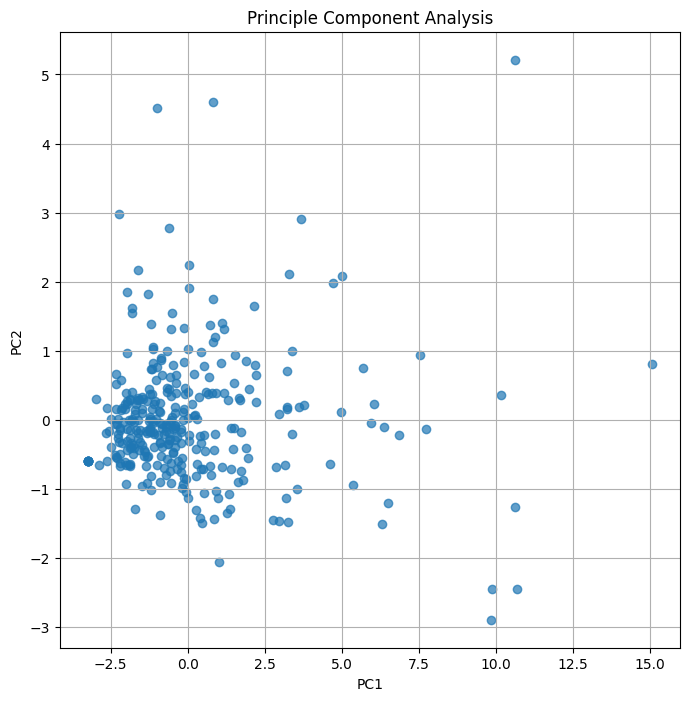

In [ ]:
# KMeansの適用
kmeans = KMeans(n_clusters=4)
kmeans.fit(df2)

# クラスタごとの特徴を解釈
cluster_labels = kmeans.labels_
df2['Cluster'] = cluster_labels

# クラスタごとのホテル数を表示
cluster_counts = df2['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# クラスタごとの特徴を表示
cluster_means = df2.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
0    174
2    115
1     30
3      8
Name: Cluster, dtype: int64
Cluster Means:
         atmosphere  cleanliness  facilities  location.y  security     staff  \
Cluster                                                                        
0          9.067816     9.632184    9.318391    9.035632  9.429885  9.630460   
1          6.323333     7.186667    6.733333    7.513333  7.266667  7.843333   
2          7.825217     8.852174    8.336522    8.657391  8.873043  9.022609   
3          3.337500     4.662500    3.662500    6.250000  5.825000  4.750000   

         valueformoney  
Cluster                 
0             9.391379  
1             7.106667  
2             8.701739  
3             5.675000  
